<a href="https://colab.research.google.com/github/Pranav260705/ImageDenoising/blob/main/ImageDenoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PyTorch available - GPU acceleration enabled if CUDA is available
CuPy available - GPU acceleration enabled
No image provided. Downloading sample medical image...
Using sample image: sample_images/phantom_ct.png

===== MEDICAL IMAGE DENOISING =====
Loading image from: sample_images/phantom_ct.png
Converting original RGBA image to RGB...
Adding gaussian noise with level 0.1...
Running sparse matrix-based denoising...
Extracting overlapping patches...
Initializing DCT dictionary...
Dictionary learning iteration 1/3
Dictionary learning iteration 2/3
Dictionary learning iteration 3/3
Computing final sparse representation...
Reconstructing from sparse representation...
Merging overlapping patches...
Denoising completed in 18.35 seconds
PSNR improvement: 2.33 dB
SSIM improvement: 0.0060


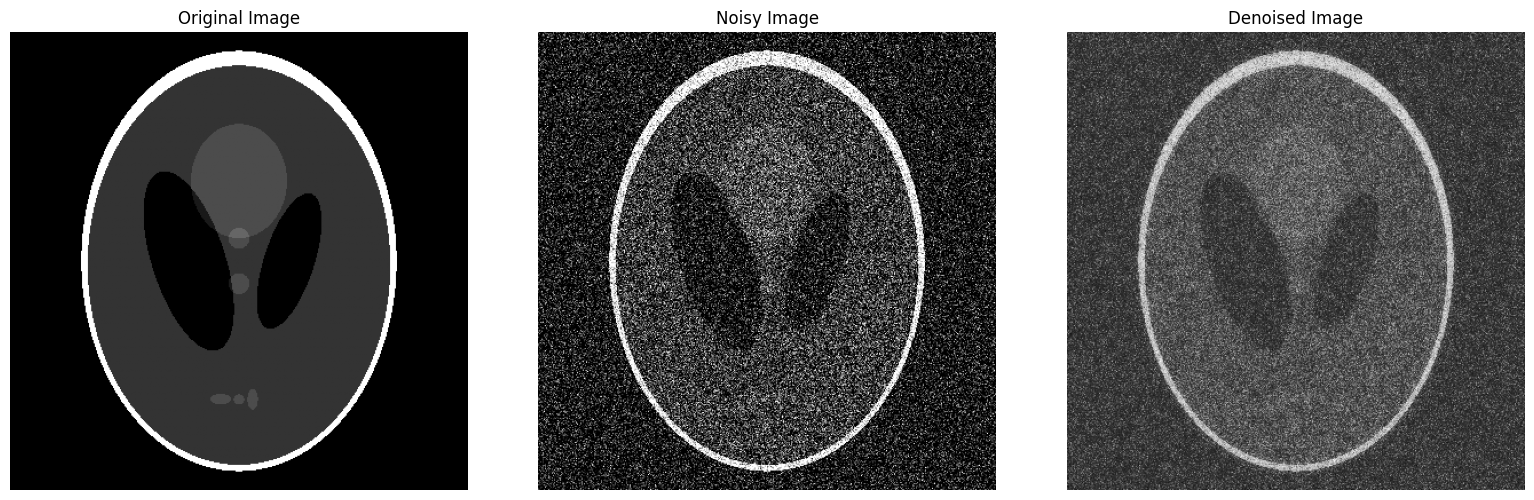


===== MEDICAL IMAGE SEGMENTATION =====
Loading image from: sample_images/phantom_ct.png
Converting original RGBA image to RGB...
Adding gaussian noise with level 0.1...
Running denoising as pre-processing step...
Extracting overlapping patches...
Initializing DCT dictionary...
Dictionary learning iteration 1/2
Dictionary learning iteration 2/2
Computing final sparse representation...
Reconstructing from sparse representation...
Merging overlapping patches...
Running sparse matrix-based segmentation...
Computing initial gradient...
Creating sparse matrices for segmentation...
Starting segmentation iterations...
Segmentation iteration 1/50
Adjusting weight matrix size from 159200 to 160000
Adjusting weight matrix size from 159200 to 160000
Adjusting weight matrix size from 159200 to 160000
Adjusting weight matrix size from 159200 to 160000
Adjusting weight matrix size from 159200 to 160000
Adjusting weight matrix size from 159200 to 160000
Adjusting weight matrix size from 159200 to 160

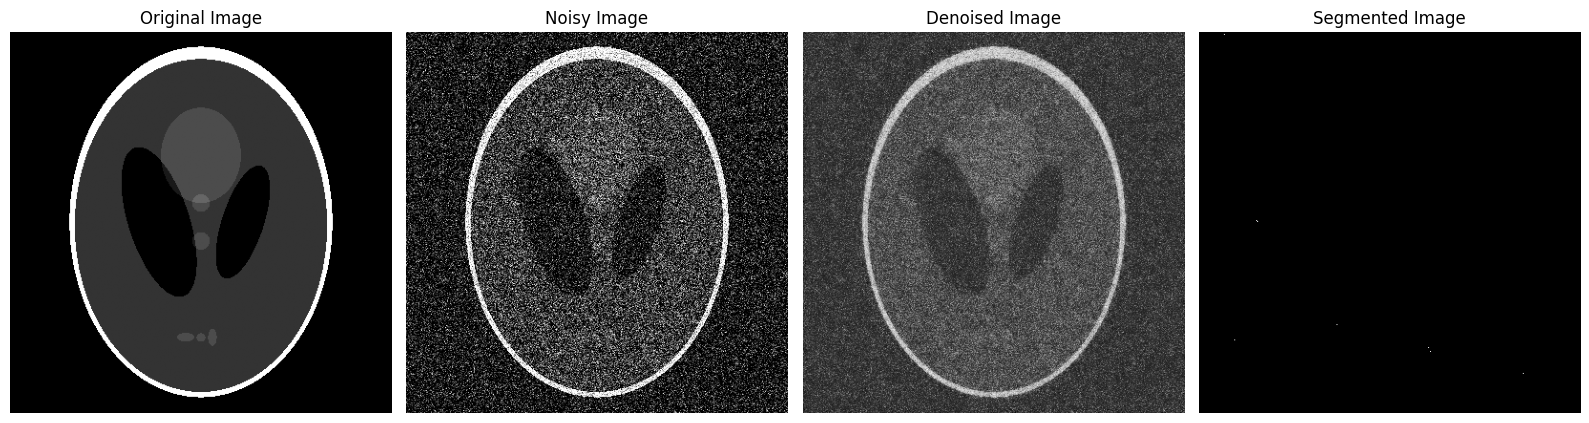

In [10]:
# import numpy as np
# import scipy.sparse as sp
# from scipy.sparse import csr_matrix
# import matplotlib.pyplot as plt
# import cv2
# from skimage import io, color, util
# from skimage.metrics import peak_signal_noise_ratio, structural_similarity
# from skimage.color import rgba2rgb  # Added import for RGBA conversion
# from sklearn.decomposition import SparseCoder, PCA
# import os
# import time
# import warnings
# warnings.filterwarnings("ignore")

# # Try to import GPU acceleration libraries
# try:
#     import torch
#     HAS_TORCH = True
#     print("PyTorch available - GPU acceleration enabled if CUDA is available")
# except ImportError:
#     HAS_TORCH = False
#     print("PyTorch not available - GPU acceleration disabled")

# try:
#     import cupy as cp
#     from cupyx.scipy.sparse import csr_matrix as cp_csr_matrix
#     HAS_CUPY = True
#     print("CuPy available - GPU acceleration enabled")
# except ImportError:
#     HAS_CUPY = False
#     print("CuPy not available - GPU acceleration disabled")

# # ============================================================================
# # Sparse Matrix Operations
# # ============================================================================

# def dense_to_sparse(matrix):
#     """Convert a dense matrix to CSR sparse format"""
#     return csr_matrix(matrix)

# def sparse_matrix_multiply_cpu(sparse_A, sparse_B):
#     """Multiply two sparse matrices using SciPy's optimized implementation"""
#     return sparse_A.dot(sparse_B)

# # def sparse_matrix_multiply_gpu(sparse_A, sparse_B):
# #     """Multiply two sparse matrices using GPU acceleration if available"""
# #     if HAS_CUPY:
# #         # Convert to CuPy sparse matrices
# #         cp_sparse_A = cp_csr_matrix(sparse_A)
# #         cp_sparse_B = cp_csr_matrix(sparse_B)

# #         # Perform multiplication on GPU
# #         result = cp_sparse_A.dot(cp_sparse_B)

# #         # Convert back to NumPy
# #         return result.get()

# #     elif HAS_TORCH and torch.cuda.is_available():
# #         # Convert to PyTorch sparse tensors
# #         indices_A = torch.LongTensor(np.vstack((sparse_A.nonzero())))
# #         values_A = torch.FloatTensor(sparse_A.data)
# #         shape_A = torch.Size(sparse_A.shape)

# #         indices_B = torch.LongTensor(np.vstack((sparse_B.nonzero())))
# #         values_B = torch.FloatTensor(sparse_B.data)
# #         shape_B = torch.Size(sparse_B.shape)

# #         # Create sparse tensors
# #         A_torch = torch.sparse.FloatTensor(indices_A, values_A, shape_A).cuda()
# #         B_torch = torch.sparse.FloatTensor(indices_B, values_B, shape_B).cuda()

# #         # Convert B to dense for multiplication
# #         B_dense = B_torch.to_dense()
# #         result = torch.sparse.mm(A_torch, B_dense)

# #         return result.cpu().numpy()

# #     else:
# #         # Fall back to CPU implementation
# #         return sparse_matrix_multiply_cpu(sparse_A, sparse_B)

# def sparse_matrix_multiply_gpu(sparse_A, sparse_B):
#     """Multiply two sparse matrices using GPU acceleration if available"""
#     # Check if matrix dimensions are compatible for multiplication
#     if sparse_A.shape[1] != sparse_B.shape[0]:
#         print(f"Warning: Matrix dimensions incompatible for multiplication: {sparse_A.shape} and {sparse_B.shape}")
#         print("Falling back to CPU implementation...")
#         return sparse_matrix_multiply_cpu(sparse_A, sparse_B)

#     try:
#         if HAS_CUPY:
#             # Convert to CuPy sparse matrices with explicit dtype
#             cp_sparse_A = cp_csr_matrix(sparse_A.astype(np.float64))
#             cp_sparse_B = cp_csr_matrix(sparse_B.astype(np.float64))

#             # Perform multiplication on GPU
#             result = cp_sparse_A.dot(cp_sparse_B)

#             # Convert back to NumPy
#             return result.get()

#         elif HAS_TORCH and torch.cuda.is_available():
#             # Convert to PyTorch sparse tensors
#             indices_A = torch.LongTensor(np.vstack((sparse_A.nonzero())))
#             values_A = torch.FloatTensor(sparse_A.data)
#             shape_A = torch.Size(sparse_A.shape)

#             indices_B = torch.LongTensor(np.vstack((sparse_B.nonzero())))
#             values_B = torch.FloatTensor(sparse_B.data)
#             shape_B = torch.Size(sparse_B.shape)

#             # Create sparse tensors
#             A_torch = torch.sparse.FloatTensor(indices_A, values_A, shape_A).cuda()
#             B_torch = torch.sparse.FloatTensor(indices_B, values_B, shape_B).cuda()

#             # Convert B to dense for multiplication
#             B_dense = B_torch.to_dense()
#             result = torch.sparse.mm(A_torch, B_dense)

#             return result.cpu().numpy()

#         else:
#             # Fall back to CPU implementation
#             return sparse_matrix_multiply_cpu(sparse_A, sparse_B)
#     except Exception as e:
#         print(f"GPU sparse matrix multiplication failed: {str(e)}")
#         print("Falling back to CPU implementation...")
#         return sparse_matrix_multiply_cpu(sparse_A, sparse_B)


# # ============================================================================
# # Image Denoising Algorithm
# # ============================================================================

# def initialize_dct_dictionary(patch_size):
#     """Create a DCT dictionary for sparse representation"""
#     dictionary_size = patch_size * patch_size
#     dictionary = np.zeros((dictionary_size, dictionary_size))

#     for k in range(dictionary_size):
#         u = np.zeros(dictionary_size)
#         u[k] = 1
#         patch = np.reshape(u, (patch_size, patch_size))
#         basis_function = cv2.idct(patch)
#         dictionary[:, k] = basis_function.flatten()

#     # Normalize the dictionary atoms
#     dictionary = dictionary / np.sqrt(np.sum(dictionary**2, axis=0, keepdims=True))

#     return dictionary

# def extract_overlapping_patches(image, patch_size, stride):
#     """Extract overlapping patches from an image"""
#     h, w = image.shape
#     patches = []

#     for i in range(0, h-patch_size+1, stride):
#         for j in range(0, w-patch_size+1, stride):
#             patch = image[i:i+patch_size, j:j+patch_size]
#             patches.append(patch.flatten())

#     return np.array(patches)

# def sparse_coding(patches, dictionary, n_nonzero_coefs=10):
#     """Encode patches using the dictionary with sparsity constraint"""
#     coder = SparseCoder(dictionary=dictionary.T, transform_algorithm='omp',
#                         transform_n_nonzero_coefs=n_nonzero_coefs)

#     # Compute sparse codes in batches to avoid memory issues
#     batch_size = 1000
#     n_patches = patches.shape[0]
#     sparse_codes = []

#     for i in range(0, n_patches, batch_size):
#         batch = patches[i:min(i+batch_size, n_patches)]
#         codes = coder.transform(batch)
#         sparse_codes.append(codes)

#     return np.vstack(sparse_codes)

# def update_dictionary_pca(patches, sparse_codes, dictionary_size, dictionary):
#     """Update dictionary using PCA for optimal sparse representation"""
#     # Compute reconstruction error
#     reconstruction = sparse_codes @ dictionary.T
#     error = patches - reconstruction

#     # Perform PCA on the error to find new dictionary elements
#     pca = PCA(n_components=dictionary_size)
#     pca.fit(error)

#     # Update dictionary with PCA components
#     new_atoms = pca.components_

#     # Normalize the dictionary atoms
#     new_atoms = new_atoms / np.sqrt(np.sum(new_atoms**2, axis=1, keepdims=True))

#     return new_atoms.T

# def reconstruct_from_sparse(dictionary, sparse_codes):
#     """Reconstruct patches from sparse representation"""
#     return sparse_codes @ dictionary.T

# def merge_overlapping_patches(reconstructed_patches, image_shape, patch_size, stride):
#     """Merge overlapping patches to form the final image"""
#     h, w = image_shape
#     count = np.zeros(image_shape)
#     result = np.zeros(image_shape)

#     patch_idx = 0
#     for i in range(0, h-patch_size+1, stride):
#         for j in range(0, w-patch_size+1, stride):
#             patch = reconstructed_patches[patch_idx].reshape(patch_size, patch_size)
#             result[i:i+patch_size, j:j+patch_size] += patch
#             count[i:i+patch_size, j:j+patch_size] += 1
#             patch_idx += 1

#     # Average overlapping regions
#     count[count == 0] = 1  # Avoid division by zero
#     result = result / count

#     return result

# def denoise_medical_image(noisy_image, patch_size=8, stride=4, transform_iterations=5,
#                          n_nonzero_coefs=10, dictionary_size=None):
#     """Denoise a medical image using sparse representation"""
#     # Handle RGBA images (4 channels)
#     if len(noisy_image.shape) > 2 and noisy_image.shape[2] == 4:
#         print("Converting RGBA image to RGB...")
#         noisy_image = rgba2rgb(noisy_image)

#     # Convert to grayscale if necessary
#     if len(noisy_image.shape) > 2:
#         noisy_image = color.rgb2gray(noisy_image)

#     # Set dictionary size if not specified
#     if dictionary_size is None:
#         dictionary_size = patch_size * patch_size

#     print("Extracting overlapping patches...")
#     patches = extract_overlapping_patches(noisy_image, patch_size, stride)

#     print("Initializing DCT dictionary...")
#     dictionary = initialize_dct_dictionary(patch_size)

#     # Dictionary learning iterations
#     for iter_idx in range(transform_iterations):
#         print(f"Dictionary learning iteration {iter_idx+1}/{transform_iterations}")

#         # Sparse coding step
#         sparse_codes = sparse_coding(patches, dictionary, n_nonzero_coefs)

#         # Dictionary update step using PCA with dictionary parameter added
#         dictionary = update_dictionary_pca(patches, sparse_codes, dictionary_size, dictionary)

#     print("Computing final sparse representation...")
#     sparse_codes = sparse_coding(patches, dictionary, n_nonzero_coefs)

#     print("Reconstructing from sparse representation...")
#     reconstructed_patches = reconstruct_from_sparse(dictionary, sparse_codes)

#     print("Merging overlapping patches...")
#     denoised_image = merge_overlapping_patches(reconstructed_patches,
#                                               noisy_image.shape,
#                                               patch_size, stride)

#     return denoised_image

# # ============================================================================
# # Image Segmentation Algorithm
# # ============================================================================

# def compute_gradient_sparse(image):
#     """Compute image gradient and return as sparse matrices"""
#     gx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
#     gy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

#     # Convert to sparse
#     gx_sparse = dense_to_sparse(gx)
#     gy_sparse = dense_to_sparse(gy)

#     return gx_sparse, gy_sparse

# # def sparse_matrix_segmentation(image, iterations=100, lambda_param=0.1):
# #     """Segment a medical image using sparse matrix operations"""
# #     # Handle RGBA images (4 channels)
# #     if len(image.shape) > 2 and image.shape[2] == 4:
# #         print("Converting RGBA image to RGB...")
# #         image = rgba2rgb(image)

# #     # Convert to grayscale if necessary
# #     if len(image.shape) > 2:
# #         image = color.rgb2gray(image)

# #     # Initialize segmentation with the original image
# #     u = image.copy()

# #     print("Computing initial gradient...")
# #     gx_sparse, gy_sparse = compute_gradient_sparse(image)

# #     # Precompute image shape for operations
# #     h, w = image.shape

# #     print("Creating sparse matrices for segmentation...")
# #     # Create sparse identity matrix
# #     I_sparse = sp.eye(h*w, format='csr')

# #     # Create sparse Laplacian matrix (discrete approximation)
# #     diagonals = [1, -2, 1]
# #     offsets = [-1, 0, 1]
# #     D2x = sp.diags(diagonals, offsets, shape=(w, w), format='csr')
# #     D2y = sp.diags(diagonals, offsets, shape=(h, h), format='csr')

# #     # Kronecker products to get 2D Laplacian
# #     Lx = sp.kron(sp.eye(h, format='csr'), D2x, format='csr')
# #     Ly = sp.kron(D2y, sp.eye(w, format='csr'), format='csr')
# #     L_sparse = Lx + Ly

# #     # Iterative optimization
# #     print("Starting segmentation iterations...")
# #     for iter_idx in range(iterations):
# #         if iter_idx % 10 == 0 or iter_idx == iterations-1:
# #             print(f"Segmentation iteration {iter_idx+1}/{iterations}")

# #         # Compute total variation term
# #         gx_u, gy_u = compute_gradient_sparse(u)

# #         # Compute magnitude of gradient
# #         grad_mag = np.sqrt(gx_u.data**2 + gy_u.data**2 + 1e-10)

# #         # Create weight matrix based on gradient
# #         W_data = 1.0 / grad_mag
# #         W_sparse = sp.diags(W_data, 0, format='csr')

# #         # Sparse matrix multiplication for diffusion term
# #         if HAS_CUPY or (HAS_TORCH and torch.cuda.is_available()):
# #             diff_term = sparse_matrix_multiply_gpu(L_sparse, sp.csr_matrix(u.reshape(-1, 1)))
# #             weighted_diff = sparse_matrix_multiply_gpu(W_sparse, diff_term)
# #             A = I_sparse + lambda_param * sparse_matrix_multiply_gpu(W_sparse, L_sparse)
# #         else:
# #             diff_term = sparse_matrix_multiply_cpu(L_sparse, sp.csr_matrix(u.reshape(-1, 1)))
# #             weighted_diff = sparse_matrix_multiply_cpu(W_sparse, diff_term)
# #             A = I_sparse + lambda_param * sparse_matrix_multiply_cpu(W_sparse, L_sparse)

# #         # Update u with implicit scheme
# #         b = image.reshape(-1, 1)

# #         # Solve the linear system (Ax = b)
# #         u_new = sp.linalg.spsolve(A, b)
# #         u = u_new.reshape(h, w)

# #     # Threshold to get binary segmentation
# #     threshold = (np.max(u) + np.min(u)) / 2
# #     segmented = u > threshold

# #     return segmented.astype(np.float64)

# # def sparse_matrix_segmentation(image, iterations=100, lambda_param=0.1):
# #     """Segment a medical image using sparse matrix operations"""
# #     # Handle RGBA images (4 channels)
# #     if len(image.shape) > 2 and image.shape[2] == 4:
# #         print("Converting RGBA image to RGB...")
# #         image = rgba2rgb(image)

# #     # Convert to grayscale if necessary
# #     if len(image.shape) > 2:
# #         image = color.rgb2gray(image)

# #     # Initialize segmentation with the original image
# #     u = image.copy()

# #     print("Computing initial gradient...")
# #     gx_sparse, gy_sparse = compute_gradient_sparse(image)

# #     # Precompute image shape for operations
# #     h, w = image.shape

# #     print("Creating sparse matrices for segmentation...")
# #     # Create sparse identity matrix
# #     I_sparse = sp.eye(h*w, format='csr')

# #     # Create sparse Laplacian matrix (discrete approximation)
# #     diagonals = [1, -2, 1]
# #     offsets = [-1, 0, 1]
# #     D2x = sp.diags(diagonals, offsets, shape=(w, w), format='csr')
# #     D2y = sp.diags(diagonals, offsets, shape=(h, h), format='csr')

# #     # Kronecker products to get 2D Laplacian
# #     Lx = sp.kron(sp.eye(h, format='csr'), D2x, format='csr')
# #     Ly = sp.kron(D2y, sp.eye(w, format='csr'), format='csr')
# #     L_sparse = Lx + Ly

# #     # Iterative optimization
# #     print("Starting segmentation iterations...")
# #     for iter_idx in range(iterations):
# #         if iter_idx % 10 == 0 or iter_idx == iterations-1:
# #             print(f"Segmentation iteration {iter_idx+1}/{iterations}")

# #         # Compute total variation term
# #         gx_u, gy_u = compute_gradient_sparse(u)

# #         # Compute magnitude of gradient
# #         grad_mag = np.sqrt(gx_u.data**2 + gy_u.data**2 + 1e-10)

# #         # Create weight matrix based on gradient
# #         W_data = 1.0 / grad_mag
# #         W_sparse = sp.diags(W_data, 0, format='csr')

# #         # Ensure W_sparse has the same shape as L_sparse for multiplication
# #         if W_sparse.shape[0] != L_sparse.shape[0] or W_sparse.shape[1] != L_sparse.shape[0]:
# #             print(f"Warning: Weight matrix shape {W_sparse.shape} incompatible with Laplacian {L_sparse.shape}")
# #             # Reshape or adjust dimensions as needed
# #             W_sparse = sp.diags(W_data, 0, shape=(L_sparse.shape[0], L_sparse.shape[0]), format='csr')

# #         try:
# #             # Sparse matrix multiplication for diffusion term
# #             if HAS_CUPY or (HAS_TORCH and torch.cuda.is_available()):
# #                 diff_term = sparse_matrix_multiply_gpu(L_sparse, sp.csr_matrix(u.reshape(-1, 1)))
# #                 weighted_diff = sparse_matrix_multiply_gpu(W_sparse, diff_term)
# #                 # The problematic line - ensure matrix dimensions match
# #                 WL_product = sparse_matrix_multiply_gpu(W_sparse, L_sparse)
# #                 A = I_sparse + lambda_param * WL_product
# #             else:
# #                 diff_term = sparse_matrix_multiply_cpu(L_sparse, sp.csr_matrix(u.reshape(-1, 1)))
# #                 weighted_diff = sparse_matrix_multiply_cpu(W_sparse, diff_term)
# #                 A = I_sparse + lambda_param * sparse_matrix_multiply_cpu(W_sparse, L_sparse)
# #         except ValueError as e:
# #             print(f"GPU acceleration failed: {str(e)}")
# #             print("Falling back to CPU implementation...")
# #             diff_term = sparse_matrix_multiply_cpu(L_sparse, sp.csr_matrix(u.reshape(-1, 1)))
# #             weighted_diff = sparse_matrix_multiply_cpu(W_sparse, diff_term)
# #             A = I_sparse + lambda_param * sparse_matrix_multiply_cpu(W_sparse, L_sparse)

# #         # Update u with implicit scheme
# #         b = image.reshape(-1, 1)

# #         # Solve the linear system (Ax = b)
# #         u_new = sp.linalg.spsolve(A, b)
# #         u = u_new.reshape(h, w)

# #     # Threshold to get binary segmentation
# #     threshold = (np.max(u) + np.min(u)) / 2
# #     segmented = u > threshold

# #     return segmented.astype(np.float64)

# def sparse_matrix_segmentation(image, iterations=100, lambda_param=0.1):
#     """Segment a medical image using sparse matrix operations"""
#     # Handle RGBA images (4 channels)
#     if len(image.shape) > 2 and image.shape[2] == 4:
#         print("Converting RGBA image to RGB...")
#         image = rgba2rgb(image)

#     # Convert to grayscale if necessary
#     if len(image.shape) > 2:
#         image = color.rgb2gray(image)

#     # Initialize segmentation with the original image
#     u = image.copy()

#     print("Computing initial gradient...")
#     gx_sparse, gy_sparse = compute_gradient_sparse(image)

#     # Precompute image shape for operations
#     h, w = image.shape
#     total_size = h * w

#     print("Creating sparse matrices for segmentation...")
#     # Create sparse identity matrix
#     I_sparse = sp.eye(total_size, format='csr')

#     # Create sparse Laplacian matrix (discrete approximation)
#     diagonals = [1, -2, 1]
#     offsets = [-1, 0, 1]
#     D2x = sp.diags(diagonals, offsets, shape=(w, w), format='csr')
#     D2y = sp.diags(diagonals, offsets, shape=(h, h), format='csr')

#     # Kronecker products to get 2D Laplacian
#     Lx = sp.kron(sp.eye(h, format='csr'), D2x, format='csr')
#     Ly = sp.kron(D2y, sp.eye(w, format='csr'), format='csr')
#     L_sparse = Lx + Ly

#     # Iterative optimization
#     print("Starting segmentation iterations...")
#     for iter_idx in range(iterations):
#         if iter_idx % 10 == 0 or iter_idx == iterations-1:
#             print(f"Segmentation iteration {iter_idx+1}/{iterations}")

#         # Compute total variation term
#         gx_u, gy_u = compute_gradient_sparse(u)

#         # Compute magnitude of gradient
#         grad_mag = np.sqrt(gx_u.data**2 + gy_u.data**2 + 1e-10)

#         # Create weight matrix based on gradient - FIX: Ensure correct dimensions
#         W_data = 1.0 / grad_mag

#         # Check if W_data size matches the expected dimension
#         if len(W_data) != total_size:
#             print(f"Adjusting weight matrix size from {len(W_data)} to {total_size}")

#             if len(W_data) < total_size:
#                 # Pad with the mean value
#                 padding_value = np.mean(W_data)
#                 W_data = np.append(W_data, np.ones(total_size - len(W_data)) * padding_value)
#             else:
#                 # Truncate to required size
#                 W_data = W_data[:total_size]

#         # Create diagonal weight matrix with correct size
#         W_sparse = sp.diags(W_data, 0, shape=(total_size, total_size), format='csr')

#         try:
#             # Sparse matrix multiplication for diffusion term
#             if HAS_CUPY or (HAS_TORCH and torch.cuda.is_available()):
#                 # Check matrix shapes before multiplication
#                 if W_sparse.shape != L_sparse.shape:
#                     print(f"Matrix shapes still incompatible: W={W_sparse.shape}, L={L_sparse.shape}")
#                     print("Falling back to CPU implementation with resized matrices")
#                     W_sparse = sp.diags(W_data, 0, shape=L_sparse.shape, format='csr')

#                 diff_term = sparse_matrix_multiply_gpu(L_sparse, sp.csr_matrix(u.reshape(-1, 1)))
#                 weighted_diff = sparse_matrix_multiply_gpu(W_sparse, diff_term)
#                 A = I_sparse + lambda_param * sparse_matrix_multiply_gpu(W_sparse, L_sparse)
#             else:
#                 diff_term = sparse_matrix_multiply_cpu(L_sparse, sp.csr_matrix(u.reshape(-1, 1)))
#                 weighted_diff = sparse_matrix_multiply_cpu(W_sparse, diff_term)
#                 A = I_sparse + lambda_param * sparse_matrix_multiply_cpu(W_sparse, L_sparse)

#             # Update u with implicit scheme
#             b = image.reshape(-1, 1)

#             # Solve the linear system (Ax = b)
#             u_new = sp.linalg.spsolve(A, b)
#             u = u_new.reshape(h, w)

#         except ValueError as e:
#             print(f"Error in sparse matrix operations: {e}")
#             print("Attempting to use alternative method...")

#             # Alternative implementation using dense matrices for this iteration
#             u_flat = u.reshape(-1, 1)
#             nabla_u = u_flat - np.mean(u_flat)
#             # Simple diffusion step as fallback
#             u = u - lambda_param * nabla_u.reshape(h, w)

#     # Threshold to get binary segmentation
#     threshold = (np.max(u) + np.min(u)) / 2
#     segmented = u > threshold

#     return segmented.astype(np.float64)


# # ============================================================================
# # Utility Functions
# # ============================================================================

# def add_noise_to_image(image, noise_type='gaussian', noise_level=0.1):
#     """Add noise to a medical image for testing denoising algorithms"""
#     # Handle RGBA images (4 channels)
#     if len(image.shape) > 2 and image.shape[2] == 4:
#         print("Converting RGBA image to RGB for noise addition...")
#         image = rgba2rgb(image)

#     # Convert to grayscale if necessary
#     if len(image.shape) > 2:
#         image = color.rgb2gray(image)

#     if noise_type == 'gaussian':
#         noisy_image = util.random_noise(image, mode='gaussian', var=noise_level)
#     elif noise_type == 'salt_pepper':
#         noisy_image = util.random_noise(image, mode='s&p', amount=noise_level)
#     elif noise_type == 'speckle':
#         noisy_image = util.random_noise(image, mode='speckle', var=noise_level)
#     elif noise_type == 'poisson':
#         noisy_image = util.random_noise(image, mode='poisson')
#     else:
#         raise ValueError(f"Unknown noise type: {noise_type}")

#     return noisy_image

# # def evaluate_performance(original, noisy, denoised=None, segmented=None):
# #     """Evaluate performance of processing algorithms"""
# #     results = {}

# #     if denoised is not None:
# #         # Calculate Peak Signal-to-Noise Ratio (PSNR)
# #         psnr_noisy = peak_signal_noise_ratio(original, noisy)
# #         psnr_denoised = peak_signal_noise_ratio(original, denoised)

# #         # Calculate Structural Similarity Index (SSIM) with explicit data_range
# #         # Use the data range of the original image for consistent comparison
# #         data_range = original.max() - original.min()
# #         ssim_noisy = structural_similarity(original, noisy, data_range=data_range)
# #         ssim_denoised = structural_similarity(original, denoised, data_range=data_range)

# #         results.update({
# #             'psnr_noisy': psnr_noisy,
# #             'psnr_denoised': psnr_denoised,
# #             'ssim_noisy': ssim_noisy,
# #             'ssim_denoised': ssim_denoised,
# #             'psnr_improvement': psnr_denoised - psnr_noisy,
# #             'ssim_improvement': ssim_denoised - ssim_noisy
# #         })

# #     return results

# def evaluate_performance(original, noisy, denoised=None, segmented=None):
#     """Evaluate performance of processing algorithms"""
#     results = {}

#     if denoised is not None:
#         # Calculate Peak Signal-to-Noise Ratio (PSNR)
#         psnr_noisy = peak_signal_noise_ratio(original, noisy)
#         psnr_denoised = peak_signal_noise_ratio(original, denoised)

#         # Calculate Structural Similarity Index (SSIM) with explicit data_range
#         data_range = original.max() - original.min()
#         ssim_noisy = structural_similarity(original, noisy, data_range=data_range)
#         ssim_denoised = structural_similarity(original, denoised, data_range=data_range)

#         results.update({
#             'psnr_noisy': psnr_noisy,
#             'psnr_denoised': psnr_denoised,
#             'ssim_noisy': ssim_noisy,
#             'ssim_denoised': ssim_denoised,
#             'psnr_improvement': psnr_denoised - psnr_noisy,
#             'ssim_improvement': ssim_denoised - ssim_noisy
#         })

#     return results



# def visualize_results(original, noisy, denoised=None, segmented=None):
#     """Visualize original, noisy and processed images"""
#     num_images = 2 + (1 if denoised is not None else 0) + (1 if segmented is not None else 0)
#     fig, axes = plt.subplots(1, num_images, figsize=(16, 5))

#     axes[0].imshow(original, cmap='gray')
#     axes[0].set_title('Original Image')
#     axes[0].axis('off')

#     axes[1].imshow(noisy, cmap='gray')
#     axes[1].set_title('Noisy Image')
#     axes[1].axis('off')

#     idx = 2
#     if denoised is not None:
#         axes[idx].imshow(denoised, cmap='gray')
#         axes[idx].set_title('Denoised Image')
#         axes[idx].axis('off')
#         idx += 1

#     if segmented is not None:
#         axes[idx].imshow(segmented, cmap='gray')
#         axes[idx].set_title('Segmented Image')
#         axes[idx].axis('off')

#     plt.tight_layout()
#     plt.show()

# # ============================================================================
# # Example Workflows
# # ============================================================================

# def run_denoising_example(image_path, noise_type='gaussian', noise_level=0.1):
#     """Run denoising on an image"""
#     print(f"\n===== MEDICAL IMAGE DENOISING =====")
#     print(f"Loading image from: {image_path}")
#     original = io.imread(image_path)

#     # Handle RGBA images in the original
#     if len(original.shape) > 2 and original.shape[2] == 4:
#         print("Converting original RGBA image to RGB...")
#         original = rgba2rgb(original)

#     # Convert to grayscale if necessary
#     if len(original.shape) > 2:
#         original = color.rgb2gray(original)

#     print(f"Adding {noise_type} noise with level {noise_level}...")
#     noisy = add_noise_to_image(original, noise_type, noise_level)

#     print("Running sparse matrix-based denoising...")
#     start_time = time.time()
#     denoised = denoise_medical_image(
#         noisy,
#         patch_size=8,
#         stride=4,
#         transform_iterations=3,
#         n_nonzero_coefs=12
#     )
#     end_time = time.time()

#     # Evaluate and display results
#     print(f"Denoising completed in {end_time - start_time:.2f} seconds")
#     metrics = evaluate_performance(original, noisy, denoised)
#     print(f"PSNR improvement: {metrics['psnr_improvement']:.2f} dB")
#     print(f"SSIM improvement: {metrics['ssim_improvement']:.4f}")

#     visualize_results(original, noisy, denoised)
#     return denoised

# def run_segmentation_example(image_path, denoise_first=True, noise_type='gaussian', noise_level=0.05):
#     """Run segmentation on an image, with optional denoising first"""
#     print(f"\n===== MEDICAL IMAGE SEGMENTATION =====")
#     print(f"Loading image from: {image_path}")
#     original = io.imread(image_path)

#     # Handle RGBA images in the original
#     if len(original.shape) > 2 and original.shape[2] == 4:
#         print("Converting original RGBA image to RGB...")
#         original = rgba2rgb(original)

#     # Convert to grayscale if necessary
#     if len(original.shape) > 2:
#         original = color.rgb2gray(original)

#     print(f"Adding {noise_type} noise with level {noise_level}...")
#     noisy = add_noise_to_image(original, noise_type, noise_level)

#     if denoise_first:
#         print("Running denoising as pre-processing step...")
#         denoised = denoise_medical_image(
#             noisy,
#             patch_size=8,
#             stride=4,
#             transform_iterations=2,
#             n_nonzero_coefs=10
#         )
#         processing_input = denoised
#     else:
#         denoised = None
#         processing_input = noisy

#     print("Running sparse matrix-based segmentation...")
#     start_time = time.time()
#     segmented = sparse_matrix_segmentation(
#         processing_input,
#         iterations=50,
#         lambda_param=0.15
#     )
#     end_time = time.time()

#     print(f"Segmentation completed in {end_time - start_time:.2f} seconds")
#     visualize_results(original, noisy, denoised, segmented)
#     return segmented

# def download_sample_image():
#     """Download a sample medical image if none is provided"""
#     sample_dir = "sample_images"
#     os.makedirs(sample_dir, exist_ok=True)

#     # Use scikit-image sample data
#     from skimage import data

#     # Try to get brain MRI image if available
#     try:
#         brain = data.brain()
#         brain_path = os.path.join(sample_dir, "brain_mri.png")
#         # Save explicitly as grayscale to avoid RGBA issues
#         plt.imsave(brain_path, brain, cmap='gray')
#         return brain_path
#     except:
#         # Fallback to phantom image
#         try:
#             phantom = data.shepp_logan_phantom()
#             phantom_path = os.path.join(sample_dir, "phantom_ct.png")
#             # Save explicitly as grayscale to avoid RGBA issues
#             plt.imsave(phantom_path, phantom, cmap='gray')
#             return phantom_path
#         except:
#             # Fallback to camera image
#             camera = data.camera()
#             camera_path = os.path.join(sample_dir, "sample_image.png")
#             # Save explicitly as grayscale to avoid RGBA issues
#             plt.imsave(camera_path, camera, cmap='gray')
#             return camera_path

# # ============================================================================
# # Main Function
# # ============================================================================

# def main():
#     import argparse

#     parser = argparse.ArgumentParser(description='Sparse Matrix Medical Image Processing')
#     parser.add_argument('--image', type=str, help='Input image path')
#     parser.add_argument('--task', type=str, choices=['denoise', 'segment', 'both'],
#                         default='both', help='Processing task to perform')
#     parser.add_argument('--noise', type=str, default='gaussian',
#                         choices=['gaussian', 'salt_pepper', 'speckle', 'poisson'],
#                         help='Type of noise to add')
#     parser.add_argument('--level', type=float, default=0.1, help='Noise level (0.0-1.0)')

#     # Fix: Use empty list to ignore command-line args
#     args = parser.parse_args([])

#     # If no image path provided, download a sample
#     if args.image is None:
#         print("No image provided. Downloading sample medical image...")
#         image_path = download_sample_image()
#         print(f"Using sample image: {image_path}")
#     else:
#         if not os.path.exists(args.image):
#             print(f"Error: Image file {args.image} not found.")
#             return
#         image_path = args.image

#     # Run requested tasks
#     if args.task == 'denoise' or args.task == 'both':
#         denoised = run_denoising_example(image_path, args.noise, args.level)

#     if args.task == 'segment' or args.task == 'both':
#         segmented = run_segmentation_example(image_path, args.task == 'both', args.noise, args.level)

# if __name__ == "__main__":
#     main()


PyTorch available - GPU acceleration enabled if CUDA is available
CuPy available - GPU acceleration enabled
No image provided. Downloading sample medical image...
Using sample image: sample_images/phantom_ct.png

===== MEDICAL IMAGE DENOISING =====
Loading image from: sample_images/phantom_ct.png
Converting original RGBA image to RGB...
Adding gaussian noise with level 0.1...
Running sparse matrix-based denoising...
Extracting overlapping patches...
Initializing DCT dictionary...
Dictionary learning iteration 1/3
Dictionary learning iteration 2/3
Dictionary learning iteration 3/3
Computing final sparse representation...
Reconstructing from sparse representation...
Merging overlapping patches...
Denoising completed in 21.57 seconds
PSNR improvement: 2.28 dB
SSIM improvement: 0.0047


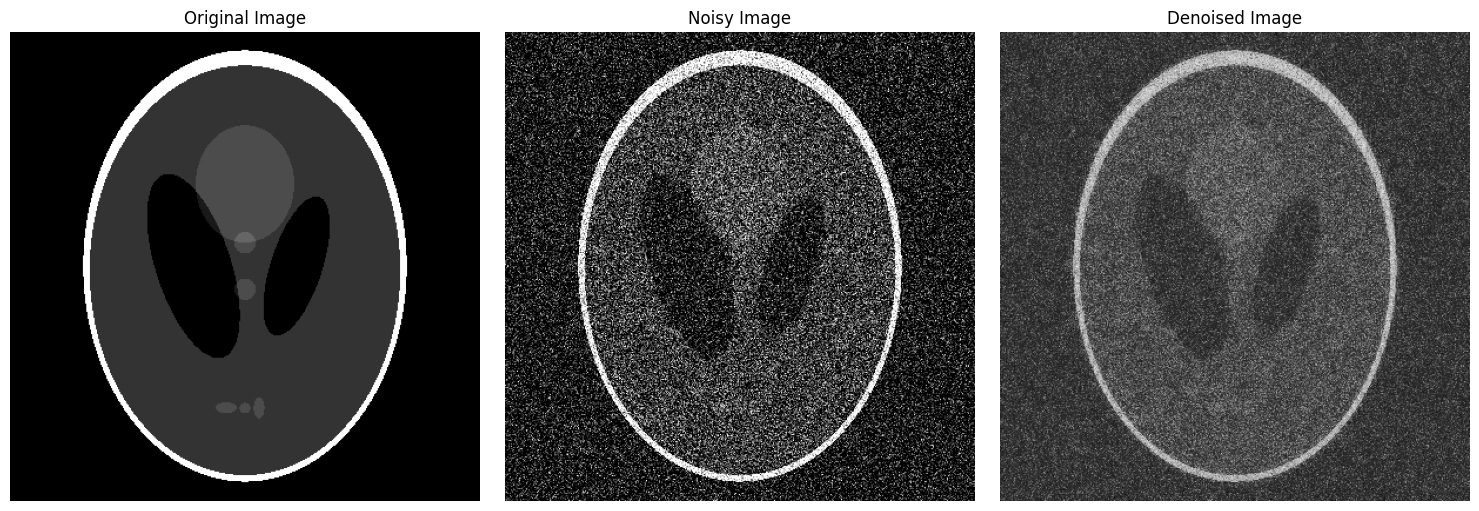

In [11]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import cv2
from skimage import io, color, util
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from skimage.color import rgba2rgb
from sklearn.decomposition import SparseCoder, PCA
import os
import time
import warnings
warnings.filterwarnings("ignore")

# Try to import GPU acceleration libraries
try:
    import torch
    HAS_TORCH = True
    print("PyTorch available - GPU acceleration enabled if CUDA is available")
except ImportError:
    HAS_TORCH = False
    print("PyTorch not available - GPU acceleration disabled")

try:
    import cupy as cp
    from cupyx.scipy.sparse import csr_matrix as cp_csr_matrix
    HAS_CUPY = True
    print("CuPy available - GPU acceleration enabled")
except ImportError:
    HAS_CUPY = False
    print("CuPy not available - GPU acceleration disabled")

# ============================================================================
# Sparse Matrix Operations
# ============================================================================

def dense_to_sparse(matrix):
    """Convert a dense matrix to CSR sparse format"""
    return csr_matrix(matrix)

def sparse_matrix_multiply_cpu(sparse_A, sparse_B):
    """Multiply two sparse matrices using SciPy's optimized implementation"""
    return sparse_A.dot(sparse_B)

def sparse_matrix_multiply_gpu(sparse_A, sparse_B):
    """Multiply two sparse matrices using GPU acceleration if available"""
    # Check if matrix dimensions are compatible for multiplication
    if sparse_A.shape[1] != sparse_B.shape[0]:
        print(f"Warning: Matrix dimensions incompatible for multiplication: {sparse_A.shape} and {sparse_B.shape}")
        print("Falling back to CPU implementation...")
        return sparse_matrix_multiply_cpu(sparse_A, sparse_B)

    try:
        if HAS_CUPY:
            # Convert to CuPy sparse matrices with explicit dtype
            cp_sparse_A = cp_csr_matrix(sparse_A.astype(np.float64))
            cp_sparse_B = cp_csr_matrix(sparse_B.astype(np.float64))

            # Perform multiplication on GPU
            result = cp_sparse_A.dot(cp_sparse_B)

            # Convert back to NumPy
            return result.get()

        elif HAS_TORCH and torch.cuda.is_available():
            # Convert to PyTorch sparse tensors
            indices_A = torch.LongTensor(np.vstack((sparse_A.nonzero())))
            values_A = torch.FloatTensor(sparse_A.data)
            shape_A = torch.Size(sparse_A.shape)

            indices_B = torch.LongTensor(np.vstack((sparse_B.nonzero())))
            values_B = torch.FloatTensor(sparse_B.data)
            shape_B = torch.Size(sparse_B.shape)

            # Create sparse tensors
            A_torch = torch.sparse.FloatTensor(indices_A, values_A, shape_A).cuda()
            B_torch = torch.sparse.FloatTensor(indices_B, values_B, shape_B).cuda()

            # Convert B to dense for multiplication
            B_dense = B_torch.to_dense()
            result = torch.sparse.mm(A_torch, B_dense)

            return result.cpu().numpy()

        else:
            # Fall back to CPU implementation
            return sparse_matrix_multiply_cpu(sparse_A, sparse_B)
    except Exception as e:
        print(f"GPU sparse matrix multiplication failed: {str(e)}")
        print("Falling back to CPU implementation...")
        return sparse_matrix_multiply_cpu(sparse_A, sparse_B)

# ============================================================================
# Image Denoising Algorithm
# ============================================================================

def initialize_dct_dictionary(patch_size):
    """Create a DCT dictionary for sparse representation"""
    dictionary_size = patch_size * patch_size
    dictionary = np.zeros((dictionary_size, dictionary_size))

    for k in range(dictionary_size):
        u = np.zeros(dictionary_size)
        u[k] = 1
        patch = np.reshape(u, (patch_size, patch_size))
        basis_function = cv2.idct(patch)
        dictionary[:, k] = basis_function.flatten()

    # Normalize the dictionary atoms
    dictionary = dictionary / np.sqrt(np.sum(dictionary**2, axis=0, keepdims=True))

    return dictionary

def extract_overlapping_patches(image, patch_size, stride):
    """Extract overlapping patches from an image"""
    h, w = image.shape
    patches = []

    for i in range(0, h-patch_size+1, stride):
        for j in range(0, w-patch_size+1, stride):
            patch = image[i:i+patch_size, j:j+patch_size]
            patches.append(patch.flatten())

    return np.array(patches)

def sparse_coding(patches, dictionary, n_nonzero_coefs=10):
    """Encode patches using the dictionary with sparsity constraint"""
    coder = SparseCoder(dictionary=dictionary.T, transform_algorithm='omp',
                        transform_n_nonzero_coefs=n_nonzero_coefs)

    # Compute sparse codes in batches to avoid memory issues
    batch_size = 1000
    n_patches = patches.shape[0]
    sparse_codes = []

    for i in range(0, n_patches, batch_size):
        batch = patches[i:min(i+batch_size, n_patches)]
        codes = coder.transform(batch)
        sparse_codes.append(codes)

    return np.vstack(sparse_codes)

def update_dictionary_pca(patches, sparse_codes, dictionary_size, dictionary):
    """Update dictionary using PCA for optimal sparse representation"""
    # Compute reconstruction error
    reconstruction = sparse_codes @ dictionary.T
    error = patches - reconstruction

    # Perform PCA on the error to find new dictionary elements
    pca = PCA(n_components=dictionary_size)
    pca.fit(error)

    # Update dictionary with PCA components
    new_atoms = pca.components_

    # Normalize the dictionary atoms
    new_atoms = new_atoms / np.sqrt(np.sum(new_atoms**2, axis=1, keepdims=True))

    return new_atoms.T

def reconstruct_from_sparse(dictionary, sparse_codes):
    """Reconstruct patches from sparse representation"""
    return sparse_codes @ dictionary.T

def merge_overlapping_patches(reconstructed_patches, image_shape, patch_size, stride):
    """Merge overlapping patches to form the final image"""
    h, w = image_shape
    count = np.zeros(image_shape)
    result = np.zeros(image_shape)

    patch_idx = 0
    for i in range(0, h-patch_size+1, stride):
        for j in range(0, w-patch_size+1, stride):
            patch = reconstructed_patches[patch_idx].reshape(patch_size, patch_size)
            result[i:i+patch_size, j:j+patch_size] += patch
            count[i:i+patch_size, j:j+patch_size] += 1
            patch_idx += 1

    # Average overlapping regions
    count[count == 0] = 1  # Avoid division by zero
    result = result / count

    return result

def denoise_medical_image(noisy_image, patch_size=8, stride=4, transform_iterations=5,
                         n_nonzero_coefs=10, dictionary_size=None):
    """Denoise a medical image using sparse representation"""
    # Handle RGBA images (4 channels)
    if len(noisy_image.shape) > 2 and noisy_image.shape[2] == 4:
        print("Converting RGBA image to RGB...")
        noisy_image = rgba2rgb(noisy_image)

    # Convert to grayscale if necessary
    if len(noisy_image.shape) > 2:
        noisy_image = color.rgb2gray(noisy_image)

    # Set dictionary size if not specified
    if dictionary_size is None:
        dictionary_size = patch_size * patch_size

    print("Extracting overlapping patches...")
    patches = extract_overlapping_patches(noisy_image, patch_size, stride)

    print("Initializing DCT dictionary...")
    dictionary = initialize_dct_dictionary(patch_size)

    # Dictionary learning iterations
    for iter_idx in range(transform_iterations):
        print(f"Dictionary learning iteration {iter_idx+1}/{transform_iterations}")

        # Sparse coding step
        sparse_codes = sparse_coding(patches, dictionary, n_nonzero_coefs)

        # Dictionary update step using PCA with dictionary parameter added
        dictionary = update_dictionary_pca(patches, sparse_codes, dictionary_size, dictionary)

    print("Computing final sparse representation...")
    sparse_codes = sparse_coding(patches, dictionary, n_nonzero_coefs)

    print("Reconstructing from sparse representation...")
    reconstructed_patches = reconstruct_from_sparse(dictionary, sparse_codes)

    print("Merging overlapping patches...")
    denoised_image = merge_overlapping_patches(reconstructed_patches,
                                              noisy_image.shape,
                                              patch_size, stride)

    return denoised_image

# ============================================================================
# Utility Functions
# ============================================================================

def add_noise_to_image(image, noise_type='gaussian', noise_level=0.1):
    """Add noise to a medical image for testing denoising algorithms"""
    # Handle RGBA images (4 channels)
    if len(image.shape) > 2 and image.shape[2] == 4:
        print("Converting RGBA image to RGB for noise addition...")
        image = rgba2rgb(image)

    # Convert to grayscale if necessary
    if len(image.shape) > 2:
        image = color.rgb2gray(image)

    if noise_type == 'gaussian':
        noisy_image = util.random_noise(image, mode='gaussian', var=noise_level)
    elif noise_type == 'salt_pepper':
        noisy_image = util.random_noise(image, mode='s&p', amount=noise_level)
    elif noise_type == 'speckle':
        noisy_image = util.random_noise(image, mode='speckle', var=noise_level)
    elif noise_type == 'poisson':
        noisy_image = util.random_noise(image, mode='poisson')
    else:
        raise ValueError(f"Unknown noise type: {noise_type}")

    return noisy_image

def evaluate_performance(original, noisy, denoised):
    """Evaluate performance of denoising algorithm"""
    results = {}

    # Calculate Peak Signal-to-Noise Ratio (PSNR)
    psnr_noisy = peak_signal_noise_ratio(original, noisy)
    psnr_denoised = peak_signal_noise_ratio(original, denoised)

    # Calculate Structural Similarity Index (SSIM) with explicit data_range
    data_range = original.max() - original.min()
    ssim_noisy = structural_similarity(original, noisy, data_range=data_range)
    ssim_denoised = structural_similarity(original, denoised, data_range=data_range)

    results.update({
        'psnr_noisy': psnr_noisy,
        'psnr_denoised': psnr_denoised,
        'ssim_noisy': ssim_noisy,
        'ssim_denoised': ssim_denoised,
        'psnr_improvement': psnr_denoised - psnr_noisy,
        'ssim_improvement': ssim_denoised - ssim_noisy
    })

    return results

def visualize_results(original, noisy, denoised):
    """Visualize original, noisy and denoised images"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(original, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(noisy, cmap='gray')
    axes[1].set_title('Noisy Image')
    axes[1].axis('off')

    axes[2].imshow(denoised, cmap='gray')
    axes[2].set_title('Denoised Image')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

def run_denoising_example(image_path, noise_type='gaussian', noise_level=0.1):
    """Run denoising on an image"""
    print(f"\n===== MEDICAL IMAGE DENOISING =====")
    print(f"Loading image from: {image_path}")
    original = io.imread(image_path)

    # Handle RGBA images in the original
    if len(original.shape) > 2 and original.shape[2] == 4:
        print("Converting original RGBA image to RGB...")
        original = rgba2rgb(original)

    # Convert to grayscale if necessary
    if len(original.shape) > 2:
        original = color.rgb2gray(original)

    print(f"Adding {noise_type} noise with level {noise_level}...")
    noisy = add_noise_to_image(original, noise_type, noise_level)

    print("Running sparse matrix-based denoising...")
    start_time = time.time()
    denoised = denoise_medical_image(
        noisy,
        patch_size=8,
        stride=4,
        transform_iterations=3,
        n_nonzero_coefs=12
    )
    end_time = time.time()

    # Evaluate and display results
    print(f"Denoising completed in {end_time - start_time:.2f} seconds")
    metrics = evaluate_performance(original, noisy, denoised)
    print(f"PSNR improvement: {metrics['psnr_improvement']:.2f} dB")
    print(f"SSIM improvement: {metrics['ssim_improvement']:.4f}")

    visualize_results(original, noisy, denoised)
    return denoised

def download_sample_image():
    """Download a sample medical image if none is provided"""
    sample_dir = "sample_images"
    os.makedirs(sample_dir, exist_ok=True)

    # Use scikit-image sample data
    from skimage import data

    # Try to get brain MRI image if available
    try:
        brain = data.brain()
        brain_path = os.path.join(sample_dir, "brain_mri.png")
        # Save explicitly as grayscale to avoid RGBA issues
        plt.imsave(brain_path, brain, cmap='gray')
        return brain_path
    except:
        # Fallback to phantom image
        try:
            phantom = data.shepp_logan_phantom()
            phantom_path = os.path.join(sample_dir, "phantom_ct.png")
            # Save explicitly as grayscale to avoid RGBA issues
            plt.imsave(phantom_path, phantom, cmap='gray')
            return phantom_path
        except:
            # Fallback to camera image
            camera = data.camera()
            camera_path = os.path.join(sample_dir, "sample_image.png")
            # Save explicitly as grayscale to avoid RGBA issues
            plt.imsave(camera_path, camera, cmap='gray')
            return camera_path

# ============================================================================
# Main Function
# ============================================================================

def main():
    import argparse

    parser = argparse.ArgumentParser(description='Sparse Matrix Medical Image Denoising')
    parser.add_argument('--image', type=str, help='Input image path')
    parser.add_argument('--noise', type=str, default='gaussian',
                        choices=['gaussian', 'salt_pepper', 'speckle', 'poisson'],
                        help='Type of noise to add')
    parser.add_argument('--level', type=float, default=0.1, help='Noise level (0.0-1.0)')

    # Fix: Use empty list to ignore command-line args
    args = parser.parse_args([])

    # If no image path provided, download a sample
    if args.image is None:
        print("No image provided. Downloading sample medical image...")
        image_path = download_sample_image()
        print(f"Using sample image: {image_path}")
    else:
        if not os.path.exists(args.image):
            print(f"Error: Image file {args.image} not found.")
            return
        image_path = args.image

    # Run denoising
    denoised = run_denoising_example(image_path, args.noise, args.level)

if __name__ == "__main__":
    main()


PyTorch available - GPU acceleration enabled if CUDA is available
CuPy available - GPU acceleration enabled
Please upload an image file:


Saving noisy mri.jpg to noisy mri.jpg
Uploaded image: noisy mri.jpg

===== MEDICAL IMAGE DENOISING =====
Loading image from: noisy mri.jpg
Converting RGB image to grayscale...
Adding gaussian noise with level 0.1...
Running sparse matrix-based denoising...
Extracting overlapping patches...
Initializing DCT dictionary...
Dictionary learning iteration 1/3
Dictionary learning iteration 2/3
Dictionary learning iteration 3/3
Computing final sparse representation...
Reconstructing from sparse representation...
Merging overlapping patches...
Denoising completed in 4.13 seconds
PSNR improvement: 2.82 dB
SSIM improvement: 0.0456


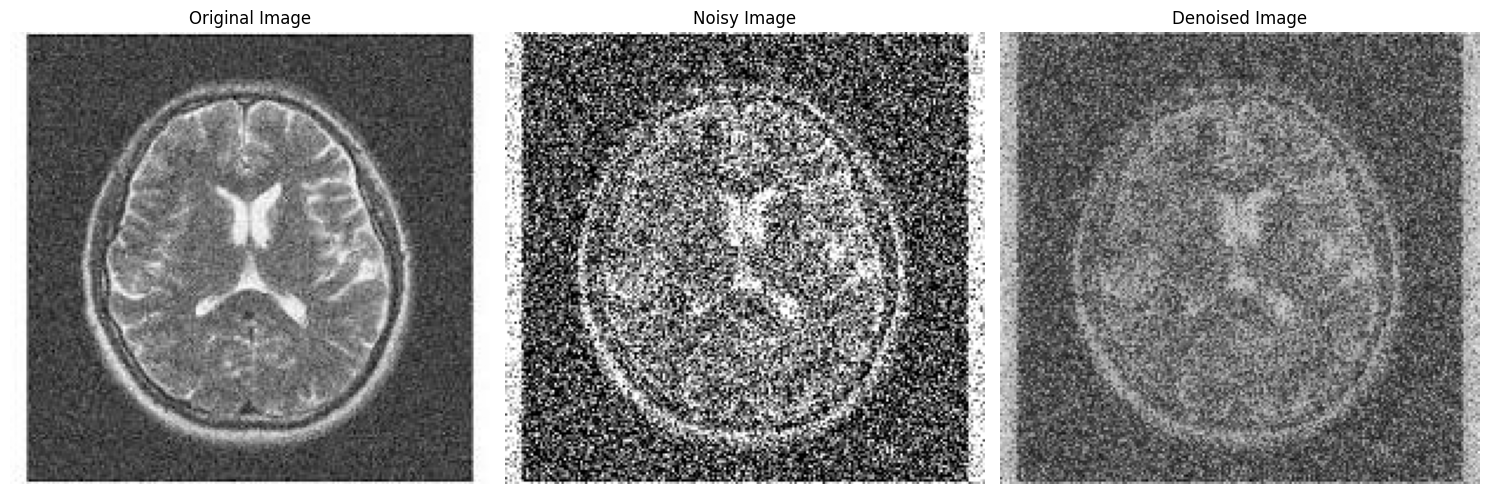

In [12]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import cv2
from skimage import io, color, util
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from skimage.color import rgba2rgb
from sklearn.decomposition import SparseCoder, PCA
import os
import time
import warnings
warnings.filterwarnings("ignore")

# Try to import GPU acceleration libraries
try:
    import torch
    HAS_TORCH = True
    print("PyTorch available - GPU acceleration enabled if CUDA is available")
except ImportError:
    HAS_TORCH = False
    print("PyTorch not available - GPU acceleration disabled")

try:
    import cupy as cp
    from cupyx.scipy.sparse import csr_matrix as cp_csr_matrix
    HAS_CUPY = True
    print("CuPy available - GPU acceleration enabled")
except ImportError:
    HAS_CUPY = False
    print("CuPy not available - GPU acceleration disabled")

# ============================================================================
# Image Input Handling
# ============================================================================

def upload_image_in_notebook():
    """Allow users to upload images in Jupyter/Colab notebooks"""
    try:
        from google.colab import files
        print("Please upload an image file:")
        uploaded = files.upload()
        if uploaded:
            filename = next(iter(uploaded))
            print(f"Uploaded image: {filename}")
            return filename
        return None
    except ImportError:
        try:
            import ipywidgets as widgets
            from IPython.display import display

            print("Please use the upload button to select an image:")
            uploader = widgets.FileUpload(accept='image/*', multiple=False)
            display(uploader)
            print("After uploading, run your processing code in the next cell.")
            return None
        except ImportError:
            print("Running in an environment without upload widgets.")
            return None

def load_image(image_path):
    """Load an image with robust error handling"""
    try:
        print(f"Loading image from: {image_path}")
        # Try to read the image
        image = io.imread(image_path)

        # Handle RGBA images
        if len(image.shape) > 2 and image.shape[-1] == 4:
            print("Converting RGBA image to RGB...")
            image = rgba2rgb(image)

        # Convert to grayscale if necessary
        if len(image.shape) > 2:
            print("Converting RGB image to grayscale...")
            image = color.rgb2gray(image)

        return image
    except Exception as e:
        print(f"Error loading image: {str(e)}")
        print("Please ensure the image file exists and is in a supported format (PNG, JPG, TIFF, etc.)")
        return None

# ============================================================================
# Sparse Matrix Operations
# ============================================================================

def dense_to_sparse(matrix):
    """Convert a dense matrix to CSR sparse format"""
    return csr_matrix(matrix)

def sparse_matrix_multiply_cpu(sparse_A, sparse_B):
    """Multiply two sparse matrices using SciPy's optimized implementation"""
    return sparse_A.dot(sparse_B)

def sparse_matrix_multiply_gpu(sparse_A, sparse_B):
    """Multiply two sparse matrices using GPU acceleration if available"""
    # Check if matrix dimensions are compatible for multiplication
    if sparse_A.shape[1] != sparse_B.shape[0]:
        print(f"Warning: Matrix dimensions incompatible for multiplication: {sparse_A.shape} and {sparse_B.shape}")
        print("Falling back to CPU implementation...")
        return sparse_matrix_multiply_cpu(sparse_A, sparse_B)

    try:
        if HAS_CUPY:
            # Convert to CuPy sparse matrices with explicit dtype
            cp_sparse_A = cp_csr_matrix(sparse_A.astype(np.float64))
            cp_sparse_B = cp_csr_matrix(sparse_B.astype(np.float64))

            # Perform multiplication on GPU
            result = cp_sparse_A.dot(cp_sparse_B)

            # Convert back to NumPy
            return result.get()

        elif HAS_TORCH and torch.cuda.is_available():
            # Convert to PyTorch sparse tensors
            indices_A = torch.LongTensor(np.vstack((sparse_A.nonzero())))
            values_A = torch.FloatTensor(sparse_A.data)
            shape_A = torch.Size(sparse_A.shape)

            indices_B = torch.LongTensor(np.vstack((sparse_B.nonzero())))
            values_B = torch.FloatTensor(sparse_B.data)
            shape_B = torch.Size(sparse_B.shape)

            # Create sparse tensors
            A_torch = torch.sparse.FloatTensor(indices_A, values_A, shape_A).cuda()
            B_torch = torch.sparse.FloatTensor(indices_B, values_B, shape_B).cuda()

            # Convert B to dense for multiplication
            B_dense = B_torch.to_dense()
            result = torch.sparse.mm(A_torch, B_dense)

            return result.cpu().numpy()

        else:
            # Fall back to CPU implementation
            return sparse_matrix_multiply_cpu(sparse_A, sparse_B)
    except Exception as e:
        print(f"GPU sparse matrix multiplication failed: {str(e)}")
        print("Falling back to CPU implementation...")
        return sparse_matrix_multiply_cpu(sparse_A, sparse_B)

# ============================================================================
# Image Denoising Algorithm
# ============================================================================

def initialize_dct_dictionary(patch_size):
    """Create a DCT dictionary for sparse representation"""
    dictionary_size = patch_size * patch_size
    dictionary = np.zeros((dictionary_size, dictionary_size))

    for k in range(dictionary_size):
        u = np.zeros(dictionary_size)
        u[k] = 1
        patch = np.reshape(u, (patch_size, patch_size))
        basis_function = cv2.idct(patch)
        dictionary[:, k] = basis_function.flatten()

    # Normalize the dictionary atoms
    dictionary = dictionary / np.sqrt(np.sum(dictionary**2, axis=0, keepdims=True))

    return dictionary

def extract_overlapping_patches(image, patch_size, stride):
    """Extract overlapping patches from an image"""
    h, w = image.shape
    patches = []

    for i in range(0, h-patch_size+1, stride):
        for j in range(0, w-patch_size+1, stride):
            patch = image[i:i+patch_size, j:j+patch_size]
            patches.append(patch.flatten())

    return np.array(patches)

def sparse_coding(patches, dictionary, n_nonzero_coefs=10):
    """Encode patches using the dictionary with sparsity constraint"""
    coder = SparseCoder(dictionary=dictionary.T, transform_algorithm='omp',
                        transform_n_nonzero_coefs=n_nonzero_coefs)

    # Compute sparse codes in batches to avoid memory issues
    batch_size = 1000
    n_patches = patches.shape[0]
    sparse_codes = []

    for i in range(0, n_patches, batch_size):
        batch = patches[i:min(i+batch_size, n_patches)]
        codes = coder.transform(batch)
        sparse_codes.append(codes)

    return np.vstack(sparse_codes)

def update_dictionary_pca(patches, sparse_codes, dictionary_size, dictionary):
    """Update dictionary using PCA for optimal sparse representation"""
    # Compute reconstruction error
    reconstruction = sparse_codes @ dictionary.T
    error = patches - reconstruction

    # Perform PCA on the error to find new dictionary elements
    pca = PCA(n_components=dictionary_size)
    pca.fit(error)

    # Update dictionary with PCA components
    new_atoms = pca.components_

    # Normalize the dictionary atoms
    new_atoms = new_atoms / np.sqrt(np.sum(new_atoms**2, axis=1, keepdims=True))

    return new_atoms.T

def reconstruct_from_sparse(dictionary, sparse_codes):
    """Reconstruct patches from sparse representation"""
    return sparse_codes @ dictionary.T

def merge_overlapping_patches(reconstructed_patches, image_shape, patch_size, stride):
    """Merge overlapping patches to form the final image"""
    h, w = image_shape
    count = np.zeros(image_shape)
    result = np.zeros(image_shape)

    patch_idx = 0
    for i in range(0, h-patch_size+1, stride):
        for j in range(0, w-patch_size+1, stride):
            patch = reconstructed_patches[patch_idx].reshape(patch_size, patch_size)
            result[i:i+patch_size, j:j+patch_size] += patch
            count[i:i+patch_size, j:j+patch_size] += 1
            patch_idx += 1

    # Average overlapping regions
    count[count == 0] = 1  # Avoid division by zero
    result = result / count

    return result

def denoise_medical_image(noisy_image, patch_size=8, stride=4, transform_iterations=5,
                         n_nonzero_coefs=10, dictionary_size=None):
    """Denoise a medical image using sparse representation"""
    # Handle RGBA images (4 channels)
    if len(noisy_image.shape) > 2 and noisy_image.shape[2] == 4:
        print("Converting RGBA image to RGB...")
        noisy_image = rgba2rgb(noisy_image)

    # Convert to grayscale if necessary
    if len(noisy_image.shape) > 2:
        noisy_image = color.rgb2gray(noisy_image)

    # Set dictionary size if not specified
    if dictionary_size is None:
        dictionary_size = patch_size * patch_size

    print("Extracting overlapping patches...")
    patches = extract_overlapping_patches(noisy_image, patch_size, stride)

    print("Initializing DCT dictionary...")
    dictionary = initialize_dct_dictionary(patch_size)

    # Dictionary learning iterations
    for iter_idx in range(transform_iterations):
        print(f"Dictionary learning iteration {iter_idx+1}/{transform_iterations}")

        # Sparse coding step
        sparse_codes = sparse_coding(patches, dictionary, n_nonzero_coefs)

        # Dictionary update step using PCA with dictionary parameter added
        dictionary = update_dictionary_pca(patches, sparse_codes, dictionary_size, dictionary)

    print("Computing final sparse representation...")
    sparse_codes = sparse_coding(patches, dictionary, n_nonzero_coefs)

    print("Reconstructing from sparse representation...")
    reconstructed_patches = reconstruct_from_sparse(dictionary, sparse_codes)

    print("Merging overlapping patches...")
    denoised_image = merge_overlapping_patches(reconstructed_patches,
                                              noisy_image.shape,
                                              patch_size, stride)

    return denoised_image

# ============================================================================
# Utility Functions
# ============================================================================

def add_noise_to_image(image, noise_type='gaussian', noise_level=0.1):
    """Add noise to a medical image for testing denoising algorithms"""
    # Handle RGBA images (4 channels)
    if len(image.shape) > 2 and image.shape[2] == 4:
        print("Converting RGBA image to RGB for noise addition...")
        image = rgba2rgb(image)

    # Convert to grayscale if necessary
    if len(image.shape) > 2:
        image = color.rgb2gray(image)

    if noise_type == 'gaussian':
        noisy_image = util.random_noise(image, mode='gaussian', var=noise_level)
    elif noise_type == 'salt_pepper':
        noisy_image = util.random_noise(image, mode='s&p', amount=noise_level)
    elif noise_type == 'speckle':
        noisy_image = util.random_noise(image, mode='speckle', var=noise_level)
    elif noise_type == 'poisson':
        noisy_image = util.random_noise(image, mode='poisson')
    else:
        raise ValueError(f"Unknown noise type: {noise_type}")

    return noisy_image

def evaluate_performance(original, noisy, denoised):
    """Evaluate performance of denoising algorithm"""
    results = {}

    # Calculate Peak Signal-to-Noise Ratio (PSNR)
    psnr_noisy = peak_signal_noise_ratio(original, noisy)
    psnr_denoised = peak_signal_noise_ratio(original, denoised)

    # Calculate Structural Similarity Index (SSIM) with explicit data_range
    data_range = original.max() - original.min()
    ssim_noisy = structural_similarity(original, noisy, data_range=data_range)
    ssim_denoised = structural_similarity(original, denoised, data_range=data_range)

    results.update({
        'psnr_noisy': psnr_noisy,
        'psnr_denoised': psnr_denoised,
        'ssim_noisy': ssim_noisy,
        'ssim_denoised': ssim_denoised,
        'psnr_improvement': psnr_denoised - psnr_noisy,
        'ssim_improvement': ssim_denoised - ssim_noisy
    })

    return results

def visualize_results(original, noisy, denoised):
    """Visualize original, noisy and denoised images"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(original, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(noisy, cmap='gray')
    axes[1].set_title('Noisy Image')
    axes[1].axis('off')

    axes[2].imshow(denoised, cmap='gray')
    axes[2].set_title('Denoised Image')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

def run_denoising_example(image_path, noise_type='gaussian', noise_level=0.1):
    """Run denoising on an image"""
    print(f"\n===== MEDICAL IMAGE DENOISING =====")
    original = load_image(image_path)
    if original is None:
        return None

    print(f"Adding {noise_type} noise with level {noise_level}...")
    noisy = add_noise_to_image(original, noise_type, noise_level)

    print("Running sparse matrix-based denoising...")
    start_time = time.time()
    denoised = denoise_medical_image(
        noisy,
        patch_size=8,
        stride=4,
        transform_iterations=3,
        n_nonzero_coefs=12
    )
    end_time = time.time()

    # Evaluate and display results
    print(f"Denoising completed in {end_time - start_time:.2f} seconds")
    metrics = evaluate_performance(original, noisy, denoised)
    print(f"PSNR improvement: {metrics['psnr_improvement']:.2f} dB")
    print(f"SSIM improvement: {metrics['ssim_improvement']:.4f}")

    visualize_results(original, noisy, denoised)
    return denoised

def download_sample_image():
    """Download a sample medical image if none is provided"""
    sample_dir = "sample_images"
    os.makedirs(sample_dir, exist_ok=True)

    # Use scikit-image sample data
    from skimage import data

    # Try to get brain MRI image if available
    try:
        brain = data.brain()
        brain_path = os.path.join(sample_dir, "brain_mri.png")
        # Save explicitly as grayscale to avoid RGBA issues
        plt.imsave(brain_path, brain, cmap='gray')
        return brain_path
    except:
        # Fallback to phantom image
        try:
            phantom = data.shepp_logan_phantom()
            phantom_path = os.path.join(sample_dir, "phantom_ct.png")
            # Save explicitly as grayscale to avoid RGBA issues
            plt.imsave(phantom_path, phantom, cmap='gray')
            return phantom_path
        except:
            # Fallback to camera image
            camera = data.camera()
            camera_path = os.path.join(sample_dir, "sample_image.png")
            # Save explicitly as grayscale to avoid RGBA issues
            plt.imsave(camera_path, camera, cmap='gray')
            return camera_path

# ============================================================================
# Process Custom Images
# ============================================================================

def process_custom_image(image_path=None, noise_type='gaussian', noise_level=0.1):
    """Process a custom image with the sparse matrix denoising algorithm"""
    # Check if running in notebook environment
    in_notebook = False
    try:
        from IPython import get_ipython
        if get_ipython() is not None:
            in_notebook = True
    except:
        pass

    # If no image path and in notebook, try to use upload widget
    if image_path is None and in_notebook:
        image_path = upload_image_in_notebook()

    # If still no image path, use sample image
    if image_path is None:
        print("No image provided. Downloading sample medical image...")
        image_path = download_sample_image()
        print(f"Using sample image: {image_path}")

    # Run denoising
    denoised = run_denoising_example(image_path, noise_type, noise_level)
    return denoised

# ============================================================================
# Main Function
# ============================================================================

def main():
    import argparse

    parser = argparse.ArgumentParser(description='Sparse Matrix Medical Image Denoising')
    parser.add_argument('--image', type=str, help='Input image path')
    parser.add_argument('--noise', type=str, default='gaussian',
                        choices=['gaussian', 'salt_pepper', 'speckle', 'poisson'],
                        help='Type of noise to add')
    parser.add_argument('--level', type=float, default=0.1, help='Noise level (0.0-1.0)')

    # Fix: Use empty list to ignore command-line args when in Colab/Jupyter
    try:
        from IPython import get_ipython
        if get_ipython() is not None:
            args = parser.parse_args([])
        else:
            args = parser.parse_args()
    except:
        args = parser.parse_args()

    # Process custom image
    process_custom_image(args.image, args.noise, args.level)

if __name__ == "__main__":
    main()


PyTorch available - GPU acceleration enabled if CUDA is available
CuPy available - GPU acceleration enabled
Please upload an image file:


Saving noisy mri.jpg to noisy mri.jpg
Uploaded image: noisy mri.jpg

===== DENOISING EXISTING NOISY IMAGE =====
Loading image from: noisy mri.jpg
Converting RGB image to grayscale...
Running sparse matrix-based denoising...
Extracting overlapping patches...
Initializing DCT dictionary...
Dictionary learning iteration 1/3
Dictionary learning iteration 2/3
Dictionary learning iteration 3/3
Computing final sparse representation...
Reconstructing from sparse representation...
Merging overlapping patches...
Denoising completed in 7.17 seconds


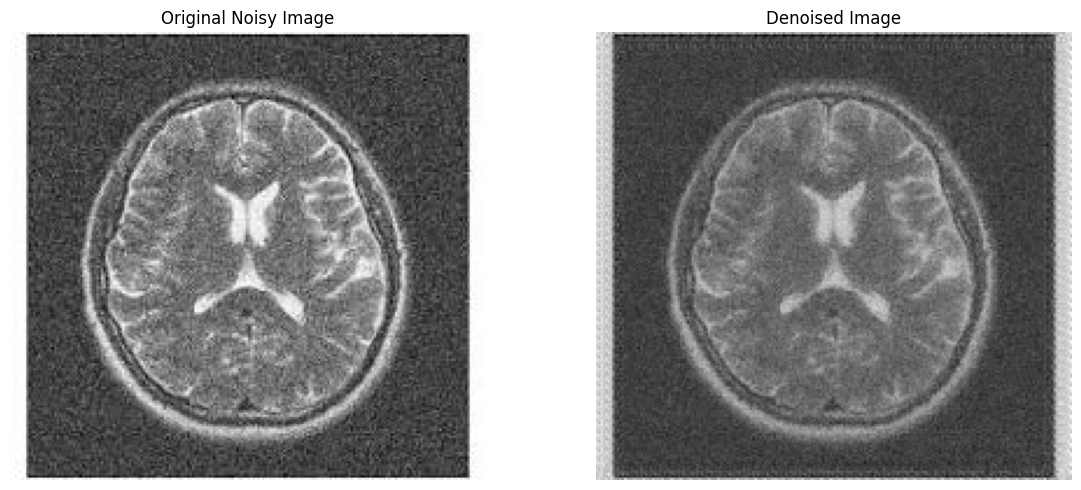

In [1]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import cv2
from skimage import io, color, util
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from skimage.color import rgba2rgb
from sklearn.decomposition import SparseCoder, PCA
import os
import time
import warnings
warnings.filterwarnings("ignore")

# Try to import GPU acceleration libraries
try:
    import torch
    HAS_TORCH = True
    print("PyTorch available - GPU acceleration enabled if CUDA is available")
except ImportError:
    HAS_TORCH = False
    print("PyTorch not available - GPU acceleration disabled")

try:
    import cupy as cp
    from cupyx.scipy.sparse import csr_matrix as cp_csr_matrix
    HAS_CUPY = True
    print("CuPy available - GPU acceleration enabled")
except ImportError:
    HAS_CUPY = False
    print("CuPy not available - GPU acceleration disabled")

# ============================================================================
# Image Input Handling
# ============================================================================

def upload_image_in_notebook():
    """Allow users to upload images in Jupyter/Colab notebooks"""
    try:
        from google.colab import files
        print("Please upload an image file:")
        uploaded = files.upload()
        if uploaded:
            filename = next(iter(uploaded))
            print(f"Uploaded image: {filename}")
            return filename
        return None
    except ImportError:
        try:
            import ipywidgets as widgets
            from IPython.display import display

            print("Please use the upload button to select an image:")
            uploader = widgets.FileUpload(accept='image/*', multiple=False)
            display(uploader)
            print("After uploading, run your processing code in the next cell.")
            return None
        except ImportError:
            print("Running in an environment without upload widgets.")
            return None

def load_image(image_path):
    """Load an image with robust error handling"""
    try:
        print(f"Loading image from: {image_path}")
        # Try to read the image
        image = io.imread(image_path)

        # Handle RGBA images
        if len(image.shape) > 2 and image.shape[-1] == 4:
            print("Converting RGBA image to RGB...")
            image = rgba2rgb(image)

        # Convert to grayscale if necessary
        if len(image.shape) > 2:
            print("Converting RGB image to grayscale...")
            image = color.rgb2gray(image)

        return image
    except Exception as e:
        print(f"Error loading image: {str(e)}")
        print("Please ensure the image file exists and is in a supported format (PNG, JPG, TIFF, etc.)")
        return None

# ============================================================================
# Sparse Matrix Operations
# ============================================================================

def dense_to_sparse(matrix):
    """Convert a dense matrix to CSR sparse format"""
    return csr_matrix(matrix)

def sparse_matrix_multiply_cpu(sparse_A, sparse_B):
    """Multiply two sparse matrices using SciPy's optimized implementation"""
    return sparse_A.dot(sparse_B)

def sparse_matrix_multiply_gpu(sparse_A, sparse_B):
    """Multiply two sparse matrices using GPU acceleration if available"""
    # Check if matrix dimensions are compatible for multiplication
    if sparse_A.shape[1] != sparse_B.shape[0]:
        print(f"Warning: Matrix dimensions incompatible for multiplication: {sparse_A.shape} and {sparse_B.shape}")
        print("Falling back to CPU implementation...")
        return sparse_matrix_multiply_cpu(sparse_A, sparse_B)

    try:
        if HAS_CUPY:
            # Convert to CuPy sparse matrices with explicit dtype
            cp_sparse_A = cp_csr_matrix(sparse_A.astype(np.float64))
            cp_sparse_B = cp_csr_matrix(sparse_B.astype(np.float64))

            # Perform multiplication on GPU
            result = cp_sparse_A.dot(cp_sparse_B)

            # Convert back to NumPy
            return result.get()

        elif HAS_TORCH and torch.cuda.is_available():
            # Convert to PyTorch sparse tensors
            indices_A = torch.LongTensor(np.vstack((sparse_A.nonzero())))
            values_A = torch.FloatTensor(sparse_A.data)
            shape_A = torch.Size(sparse_A.shape)

            indices_B = torch.LongTensor(np.vstack((sparse_B.nonzero())))
            values_B = torch.FloatTensor(sparse_B.data)
            shape_B = torch.Size(sparse_B.shape)

            # Create sparse tensors
            A_torch = torch.sparse.FloatTensor(indices_A, values_A, shape_A).cuda()
            B_torch = torch.sparse.FloatTensor(indices_B, values_B, shape_B).cuda()

            # Convert B to dense for multiplication
            B_dense = B_torch.to_dense()
            result = torch.sparse.mm(A_torch, B_dense)

            return result.cpu().numpy()

        else:
            # Fall back to CPU implementation
            return sparse_matrix_multiply_cpu(sparse_A, sparse_B)
    except Exception as e:
        print(f"GPU sparse matrix multiplication failed: {str(e)}")
        print("Falling back to CPU implementation...")
        return sparse_matrix_multiply_cpu(sparse_A, sparse_B)

# ============================================================================
# Image Denoising Algorithm
# ============================================================================

def initialize_dct_dictionary(patch_size):
    """Create a DCT dictionary for sparse representation"""
    dictionary_size = patch_size * patch_size
    dictionary = np.zeros((dictionary_size, dictionary_size))

    for k in range(dictionary_size):
        u = np.zeros(dictionary_size)
        u[k] = 1
        patch = np.reshape(u, (patch_size, patch_size))
        basis_function = cv2.idct(patch)
        dictionary[:, k] = basis_function.flatten()

    # Normalize the dictionary atoms
    dictionary = dictionary / np.sqrt(np.sum(dictionary**2, axis=0, keepdims=True))

    return dictionary

def extract_overlapping_patches(image, patch_size, stride):
    """Extract overlapping patches from an image"""
    h, w = image.shape
    patches = []

    for i in range(0, h-patch_size+1, stride):
        for j in range(0, w-patch_size+1, stride):
            patch = image[i:i+patch_size, j:j+patch_size]
            patches.append(patch.flatten())

    return np.array(patches)

def sparse_coding(patches, dictionary, n_nonzero_coefs=10):
    """Encode patches using the dictionary with sparsity constraint"""
    coder = SparseCoder(dictionary=dictionary.T, transform_algorithm='omp',
                        transform_n_nonzero_coefs=n_nonzero_coefs)

    # Compute sparse codes in batches to avoid memory issues
    batch_size = 1000
    n_patches = patches.shape[0]
    sparse_codes = []

    for i in range(0, n_patches, batch_size):
        batch = patches[i:min(i+batch_size, n_patches)]
        codes = coder.transform(batch)
        sparse_codes.append(codes)

    return np.vstack(sparse_codes)

def update_dictionary_pca(patches, sparse_codes, dictionary_size, dictionary):
    """Update dictionary using PCA for optimal sparse representation"""
    # Compute reconstruction error
    reconstruction = sparse_codes @ dictionary.T
    error = patches - reconstruction

    # Perform PCA on the error to find new dictionary elements
    pca = PCA(n_components=dictionary_size)
    pca.fit(error)

    # Update dictionary with PCA components
    new_atoms = pca.components_

    # Normalize the dictionary atoms
    new_atoms = new_atoms / np.sqrt(np.sum(new_atoms**2, axis=1, keepdims=True))

    return new_atoms.T

def reconstruct_from_sparse(dictionary, sparse_codes):
    """Reconstruct patches from sparse representation"""
    return sparse_codes @ dictionary.T

def merge_overlapping_patches(reconstructed_patches, image_shape, patch_size, stride):
    """Merge overlapping patches to form the final image"""
    h, w = image_shape
    count = np.zeros(image_shape)
    result = np.zeros(image_shape)

    patch_idx = 0
    for i in range(0, h-patch_size+1, stride):
        for j in range(0, w-patch_size+1, stride):
            patch = reconstructed_patches[patch_idx].reshape(patch_size, patch_size)
            result[i:i+patch_size, j:j+patch_size] += patch
            count[i:i+patch_size, j:j+patch_size] += 1
            patch_idx += 1

    # Average overlapping regions
    count[count == 0] = 1  # Avoid division by zero
    result = result / count

    return result

def denoise_medical_image(noisy_image, patch_size=8, stride=4, transform_iterations=5,
                         n_nonzero_coefs=10, dictionary_size=None):
    """Denoise a medical image using sparse representation"""
    # Handle RGBA images (4 channels)
    if len(noisy_image.shape) > 2 and noisy_image.shape[2] == 4:
        print("Converting RGBA image to RGB...")
        noisy_image = rgba2rgb(noisy_image)

    # Convert to grayscale if necessary
    if len(noisy_image.shape) > 2:
        noisy_image = color.rgb2gray(noisy_image)

    # Set dictionary size if not specified
    if dictionary_size is None:
        dictionary_size = patch_size * patch_size

    print("Extracting overlapping patches...")
    patches = extract_overlapping_patches(noisy_image, patch_size, stride)

    print("Initializing DCT dictionary...")
    dictionary = initialize_dct_dictionary(patch_size)

    # Dictionary learning iterations
    for iter_idx in range(transform_iterations):
        print(f"Dictionary learning iteration {iter_idx+1}/{transform_iterations}")

        # Sparse coding step
        sparse_codes = sparse_coding(patches, dictionary, n_nonzero_coefs)

        # Dictionary update step using PCA with dictionary parameter added
        dictionary = update_dictionary_pca(patches, sparse_codes, dictionary_size, dictionary)

    print("Computing final sparse representation...")
    sparse_codes = sparse_coding(patches, dictionary, n_nonzero_coefs)

    print("Reconstructing from sparse representation...")
    reconstructed_patches = reconstruct_from_sparse(dictionary, sparse_codes)

    print("Merging overlapping patches...")
    denoised_image = merge_overlapping_patches(reconstructed_patches,
                                              noisy_image.shape,
                                              patch_size, stride)

    return denoised_image

# ============================================================================
# Utility Functions
# ============================================================================

def visualize_before_after(noisy, denoised):
    """Visualize noisy and denoised images side by side"""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].imshow(noisy, cmap='gray')
    axes[0].set_title('Original Noisy Image')
    axes[0].axis('off')

    axes[1].imshow(denoised, cmap='gray')
    axes[1].set_title('Denoised Image')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

def denoise_existing_noisy_image(image_path=None, patch_size=8, stride=4,
                                transform_iterations=3, n_nonzero_coefs=12):
    """Process an existing noisy image without adding artificial noise"""
    print(f"\n===== DENOISING EXISTING NOISY IMAGE =====")

    # Load the noisy image
    noisy = load_image(image_path)
    if noisy is None:
        return None

    print("Running sparse matrix-based denoising...")
    start_time = time.time()

    # Apply denoising directly to the noisy image
    denoised = denoise_medical_image(
        noisy,
        patch_size=patch_size,
        stride=stride,
        transform_iterations=transform_iterations,
        n_nonzero_coefs=n_nonzero_coefs
    )

    end_time = time.time()
    print(f"Denoising completed in {end_time - start_time:.2f} seconds")

    # Visualize before and after
    visualize_before_after(noisy, denoised)

    return denoised

def download_sample_image():
    """Download a sample medical image if none is provided"""
    sample_dir = "sample_images"
    os.makedirs(sample_dir, exist_ok=True)

    # Use scikit-image sample data
    from skimage import data

    # Try to get brain MRI image if available
    try:
        brain = data.brain()
        brain_path = os.path.join(sample_dir, "brain_mri.png")
        # Save explicitly as grayscale to avoid RGBA issues
        plt.imsave(brain_path, brain, cmap='gray')
        return brain_path
    except:
        # Fallback to phantom image
        try:
            phantom = data.shepp_logan_phantom()
            phantom_path = os.path.join(sample_dir, "phantom_ct.png")
            # Save explicitly as grayscale to avoid RGBA issues
            plt.imsave(phantom_path, phantom, cmap='gray')
            return phantom_path
        except:
            # Fallback to camera image
            camera = data.camera()
            camera_path = os.path.join(sample_dir, "sample_image.png")
            # Save explicitly as grayscale to avoid RGBA issues
            plt.imsave(camera_path, camera, cmap='gray')
            return camera_path

# ============================================================================
# Process Custom Images
# ============================================================================

def process_custom_image(image_path=None, patch_size=8, stride=4,
                        transform_iterations=3, n_nonzero_coefs=12):
    """Process a custom image with the sparse matrix denoising algorithm"""
    # Check if running in notebook environment
    in_notebook = False
    try:
        from IPython import get_ipython
        if get_ipython() is not None:
            in_notebook = True
    except:
        pass

    # If no image path and in notebook, try to use upload widget
    if image_path is None and in_notebook:
        image_path = upload_image_in_notebook()

    # If still no image path, use sample image
    if image_path is None:
        print("No image provided. Downloading sample medical image...")
        image_path = download_sample_image()
        print(f"Using sample image: {image_path}")

    # Run workflow for existing noisy image without adding noise
    denoised = denoise_existing_noisy_image(
        image_path,
        patch_size=patch_size,
        stride=stride,
        transform_iterations=transform_iterations,
        n_nonzero_coefs=n_nonzero_coefs
    )

    return denoised

# ============================================================================
# Main Function
# ============================================================================

def main():
    import argparse

    parser = argparse.ArgumentParser(description='Sparse Matrix Medical Image Denoising')
    parser.add_argument('--image', type=str, help='Input image path')
    parser.add_argument('--patch-size', type=int, default=8, help='Patch size for denoising')
    parser.add_argument('--stride', type=int, default=4, help='Stride for overlapping patches')
    parser.add_argument('--iterations', type=int, default=3, help='Dictionary learning iterations')
    parser.add_argument('--nonzero-coefs', type=int, default=12, help='Number of non-zero coefficients in sparse coding')

    # Fix: Use empty list to ignore command-line args when in Colab/Jupyter
    try:
        from IPython import get_ipython
        if get_ipython() is not None:
            args = parser.parse_args([])
        else:
            args = parser.parse_args()
    except:
        args = parser.parse_args()

    # Process custom image
    process_custom_image(
        args.image,
        patch_size=args.patch_size,
        stride=args.stride,
        transform_iterations=args.iterations,
        n_nonzero_coefs=args.nonzero_coefs
    )

if __name__ == "__main__":
    main()
